In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_waveforms(data,channel,times,pre=0.5,post=1.5,channels=384,sampling_rate=30000):
    #input can be memory mapped file or a string specifiying the file to memory map. if string, deletes the memory mapped object when done, for hygiene.
    pre = pre * .001
    post = post * .001
    channel = int(channel)
    channels = int(channels)
    if type(data)==str:
        mm = np.memmap(data, dtype=np.int16, mode='r')
    else:
        mm=data
    waveforms=[]
    for i in times:
        start = int((i - pre) * sampling_rate) * int(channels)
        temp = mm[start:start+int((pre+post)*sampling_rate*channels)][channel::channels]# - mm[start:start+int((pre+post)*sampling_rate*channels)][channel::channels][0]
        temp = temp - temp[0]
        waveforms.extend([temp * 0.195])
    if type(data)==str:
        del mm
    return waveforms

In [3]:
def mean_waveform(rawdata,times,pre=0.5,post=1.5,channels=384,sampling_rate=30000):
    mean_waveform = []#np.zeros(channels,int((pre+post)*.001)*sampling_rate*channels)
    for i,ch in enumerate(np.linspace(0,channels-1,channels).astype(int)):
        try:
            w = load_waveforms(rawdata,ch,times,pre,post,channels,sampling_rate)
        except:
            w = np.zeros((len(times),int(((pre+post)/1000.)*sampling_rate)))
        mean_waveform.append(np.mean(w,axis=0))#[i,:]=np.mean(w).flatten()
    return mean_waveform

def probe_waveforms(rawdata,times,pre=0.5,post=1.5,channels=384,sampling_rate=30000):
    probe_waveform = np.zeros((channels,int((pre+post)*.001*sampling_rate),len(times)))
    for i,ch in enumerate(np.linspace(0,channels-1,channels).astype(int)):
        try:
            probe_waveform[i,:,:] = np.array(load_waveforms(rawdata,ch,times,pre,post,channels,sampling_rate)).T
            probe_waveform[i,:,:] -= np.mean(probe_waveform[i,:,:])
        except:
            probe_waveform[i,:,:] = 0.#np.zeros((len(times),int(((pre+post)/1000.)*sampling_rate)))
    return probe_waveform.T

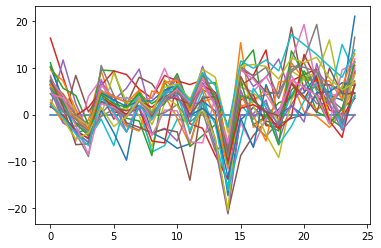

In [22]:
waveforms = mean_waveform(rawdata=r"E:\C41\20210525_c41_ABC_g0\20210525_c41_ABC_g0_imec0\20210525_c41_ABC_g0_t0.imec0.ap.bin",
                          times=[100], pre=0.5,post=0.5)
plt.plot(waveforms[50:75])
plt.show()